# BART



### 0. Setup BART on Google Colab

The cell will setup BART on Google Colab. For a detailed explanation, see **How to Run BART on Google Colaboratory** in the [repository 2021](https://github.com/mrirecon/bart-workshop/tree/master/ismrm2021). You can skip this part if you want to run this notebook on Binder or your local machine with BART already installed.

In [1]:
%%bash

# Install BARTs dependencies
apt-get install -y make gcc libfftw3-dev liblapacke-dev libpng-dev libopenblas-dev bc &> /dev/null

# Clone Bart
[ -d /content/bart ] && rm -r /content/bart
git clone https://github.com/mrirecon/bart/ bart &> /dev/null

In [2]:
%%bash

BRANCH=v0.7.00

cd bart

# Switch to desired branch of the BART project
git checkout -q $BRANCH

# Define specifications 
COMPILE_SPECS="PARALLEL=1"

printf "%s\n" $COMPILE_SPECS > Makefiles/Makefile.local

make &> /dev/null

In [3]:
import os
import sys

# Define environment variables for BART and OpenMP

os.environ['TOOLBOX_PATH'] = "/content/bart"

os.environ['OMP_NUM_THREADS']="4"

# Add the BARTs toolbox to the PATH variable

os.environ['PATH'] = os.environ['TOOLBOX_PATH'] + ":" + os.environ['PATH']
sys.path.append(os.environ['TOOLBOX_PATH'] + "/python")

#### Check BART version

Let us check the installed BART version.

In [4]:
%%bash

echo "# The BART used in this notebook:"
which bart
echo "# BART version: "
bart version

# The BART used in this notebook:
/content/bart/bart
# BART version: 
v0.7.00


### Function for Visualization

In [5]:
import sys
import os
sys.path.insert(0, os.path.join(os.environ['TOOLBOX_PATH'], 'python'))
import cfl

import numpy as np
import matplotlib.pyplot as plt

    
def imshow(img):
    
    plt.imshow(np.abs(img.squeeze()))
        


Simulate k-space data:


In [6]:
! bart phantom -k ksp

Look at the header file:

In [7]:
! cat ksp.hdr

# Dimensions
128 128 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
phantom -k ksp 
# Files
 >ksp
# Creator
BART v0.7.00


Apply inverse Fourier transform:

In [8]:
! bart fft -i $(bart bitmask 0 1) ksp img

Show the reconstructed image:

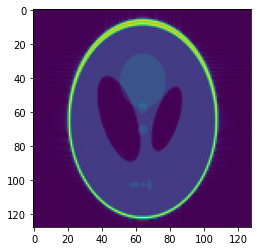

In [9]:
img = cfl.readcfl('img')
imshow(img)

In [10]:
%%bash
rm *.{hdr,cfl}